In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

In [2]:
loc = '../data/'
file = 'data_features.csv'
df = pd.read_csv(loc+file)

try:
    df = df.drop(['str_dif.1'], axis=1)
except:
    pass

df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6317, 22)


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238
6315,win,Orlando Wiet,Robert Lucarelli,1994-03-11,Open Weight,KO/TKO,Other,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238


In [3]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6317.000000,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03,6.317000e+03
mean,1.348872e-16,-4.651706e-17,-1.172000e-16,-3.267245e-16,2.792693e-17,-1.044843e-17,-0.004021,-7.724064e-17,1.054784e-16,7.268428e-18,4.622268e-18,3.341090e-13,-2.124980e-16,3.001994e-16,-1.175288e-15
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.028994,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-6.728387e+00,-6.646211e+00,-7.837898e+00,-8.583429e+00,-4.871612e+00,-3.483014e+00,-15.100000,-1.209250e+01,-6.882324e+00,-1.279327e+01,-5.483791e+00,-3.130904e+00,-2.496074e+00,-6.686804e+00,-5.116024e+00
25%,5.329838e-03,-4.952320e-01,-3.794386e-01,-3.395612e-03,-5.731124e-01,-6.070680e-01,-0.500000,-6.476963e-01,-5.247152e-01,-5.634817e-01,-5.312383e-01,1.988308e-01,-4.908023e-01,-5.582846e-01,-1.823808e-02
50%,5.329838e-03,-1.641328e-02,1.311195e-02,-3.395612e-03,9.735001e-03,-1.801885e-02,0.000000,-1.816928e-02,-2.931713e-02,-6.837106e-04,-9.916962e-03,1.988308e-01,-2.042985e-02,-1.146556e-03,-1.823808e-02
75%,5.329838e-03,4.992376e-01,4.056625e-01,-3.395612e-03,5.757694e-01,6.056802e-01,0.500000,6.365388e-01,5.486473e-01,5.747614e-01,5.114044e-01,1.988308e-01,5.242119e-01,5.559915e-01,-1.823808e-02
max,6.739047e+00,1.147524e+01,5.116269e+00,6.860631e+00,6.734897e+00,3.446976e+00,15.400000,5.905680e+00,6.163159e+00,7.992312e+00,6.245940e+00,9.022674e+00,2.455215e+00,8.913063e+00,6.099105e+00


In [4]:
features = df.columns[7:]
len(features)
print(features)

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')


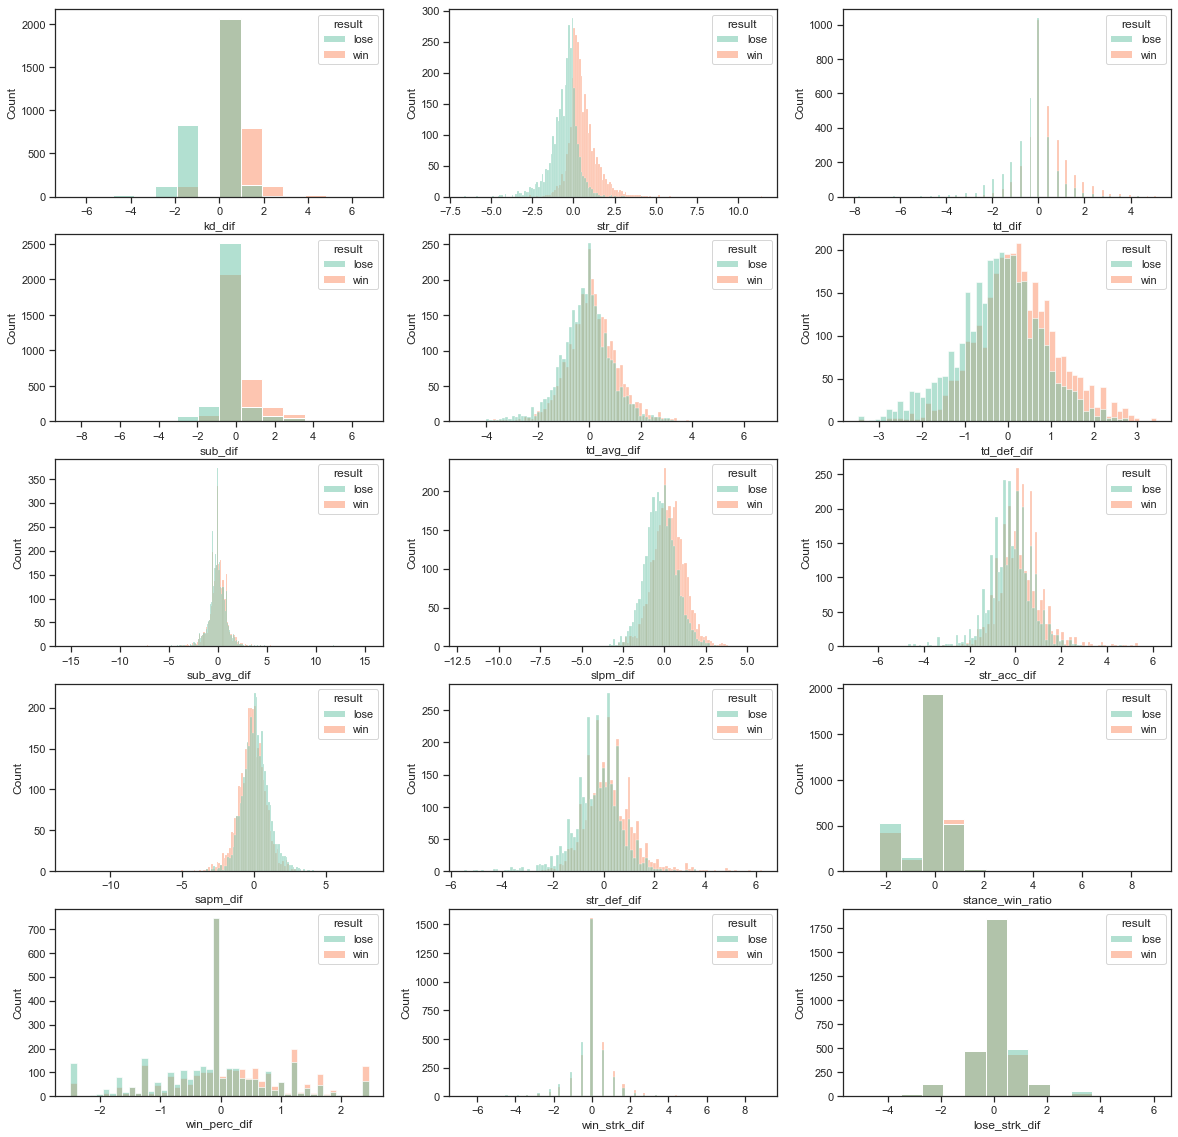

In [5]:
rows=5
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,20))

i = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(ax=axs[row,col], x=features[i], data=df, hue='result')
        i += 1

In [6]:
X = features # prediction model features
data = df.copy()
data['outlier'] = False

for feature in X:
    ucl = np.mean(df[feature]) + 3*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3*np.std(df[feature])
    
    inlier_list = df.index[(df[feature] > ucl)|(df[feature] < lcl)]
    data.loc[inlier_list,'outlier'] = True
    print('1d Outliers at %s: %s' %(feature,len(inlier_list)))

data.head(3)       

1d Outliers at kd_dif: 55
1d Outliers at str_dif: 88
1d Outliers at td_dif: 108
1d Outliers at sub_dif: 116
1d Outliers at td_avg_dif: 79
1d Outliers at td_def_dif: 23
1d Outliers at sub_avg_dif: 92
1d Outliers at slpm_dif: 44
1d Outliers at str_acc_dif: 110
1d Outliers at sapm_dif: 63
1d Outliers at str_def_dif: 117
1d Outliers at stance_win_ratio: 48
1d Outliers at win_perc_dif: 0
1d Outliers at win_strk_dif: 115
1d Outliers at lose_strk_dif: 190


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,0.005330,-2.631500,0.013112,-0.003396,0.480496,-0.295218,0.0,-2.441848,-0.607282,-1.221133,0.163857,1.090338,0.647994,5.570234,-1.037795,True
1,lose,Billy Quarantillo,Edson Barboza,2023-04-15,Featherweight,KO/TKO,Knee,-1.341414,-0.090078,0.013112,-0.003396,0.643021,-0.607068,1.1,2.392919,1.126612,1.055353,-1.573881,0.198831,0.276647,0.555992,-2.057352,False
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.341414,-0.126910,0.013112,-0.003396,-0.186416,-0.814968,0.0,0.510633,-0.854981,0.574761,0.076970,-1.724902,-0.515559,-0.558285,1.001319,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

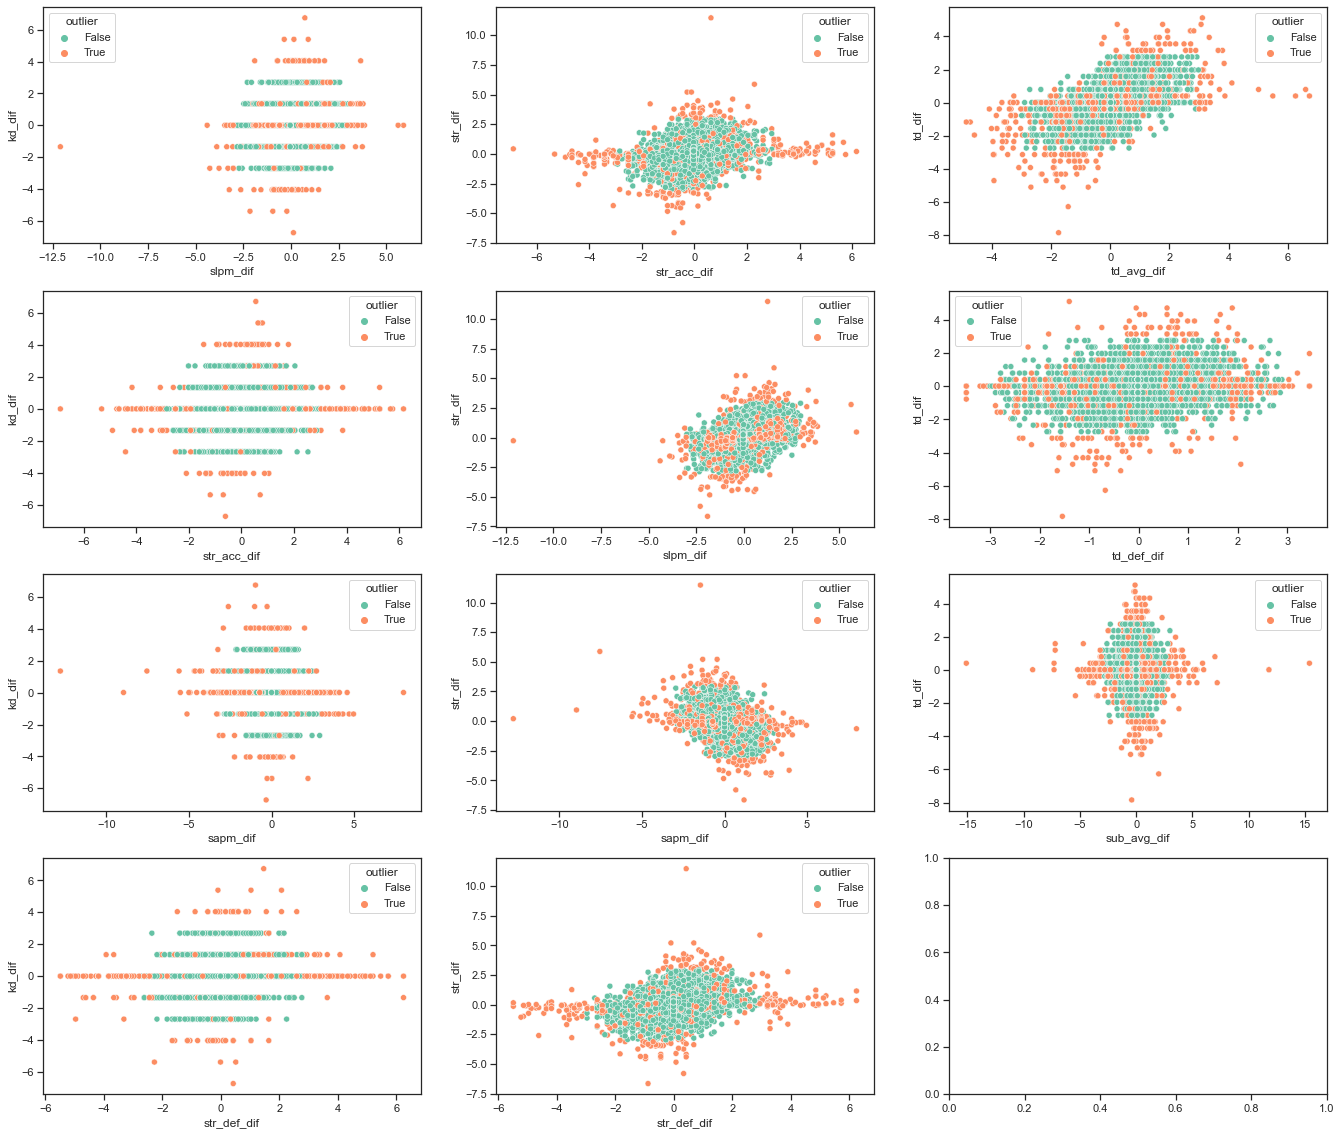

In [7]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='outlier')

## Train Local Outlier Factor model: 
LOF model detect outliers based on data points density, a point with lower density will be counted as an outlier

In [8]:
X

Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td_avg_dif', 'td_def_dif',
       'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif'],
      dtype='object')

In [9]:
lof = set_outlier_detection_model(X_columns=X, data=data, n=20, contemination=0.05)
lof

LocalOutlierFactor(contamination=0.05, n_jobs=-1)

In [10]:
data['lof_inlier'] = lof.fit_predict(data[X])
lof_outliers = data.index[data.lof_inlier == -1]
data['lof_outlier'] = False
data.loc[lof_outliers, 'lof_outlier'] = True
data = data.drop(['lof_inlier'], axis=1)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238,False,False
6315,win,Orlando Wiet,Robert Lucarelli,1994-03-11,Open Weight,KO/TKO,Other,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,False,False


<AxesSubplot:xlabel='sub_avg_dif', ylabel='td_dif'>

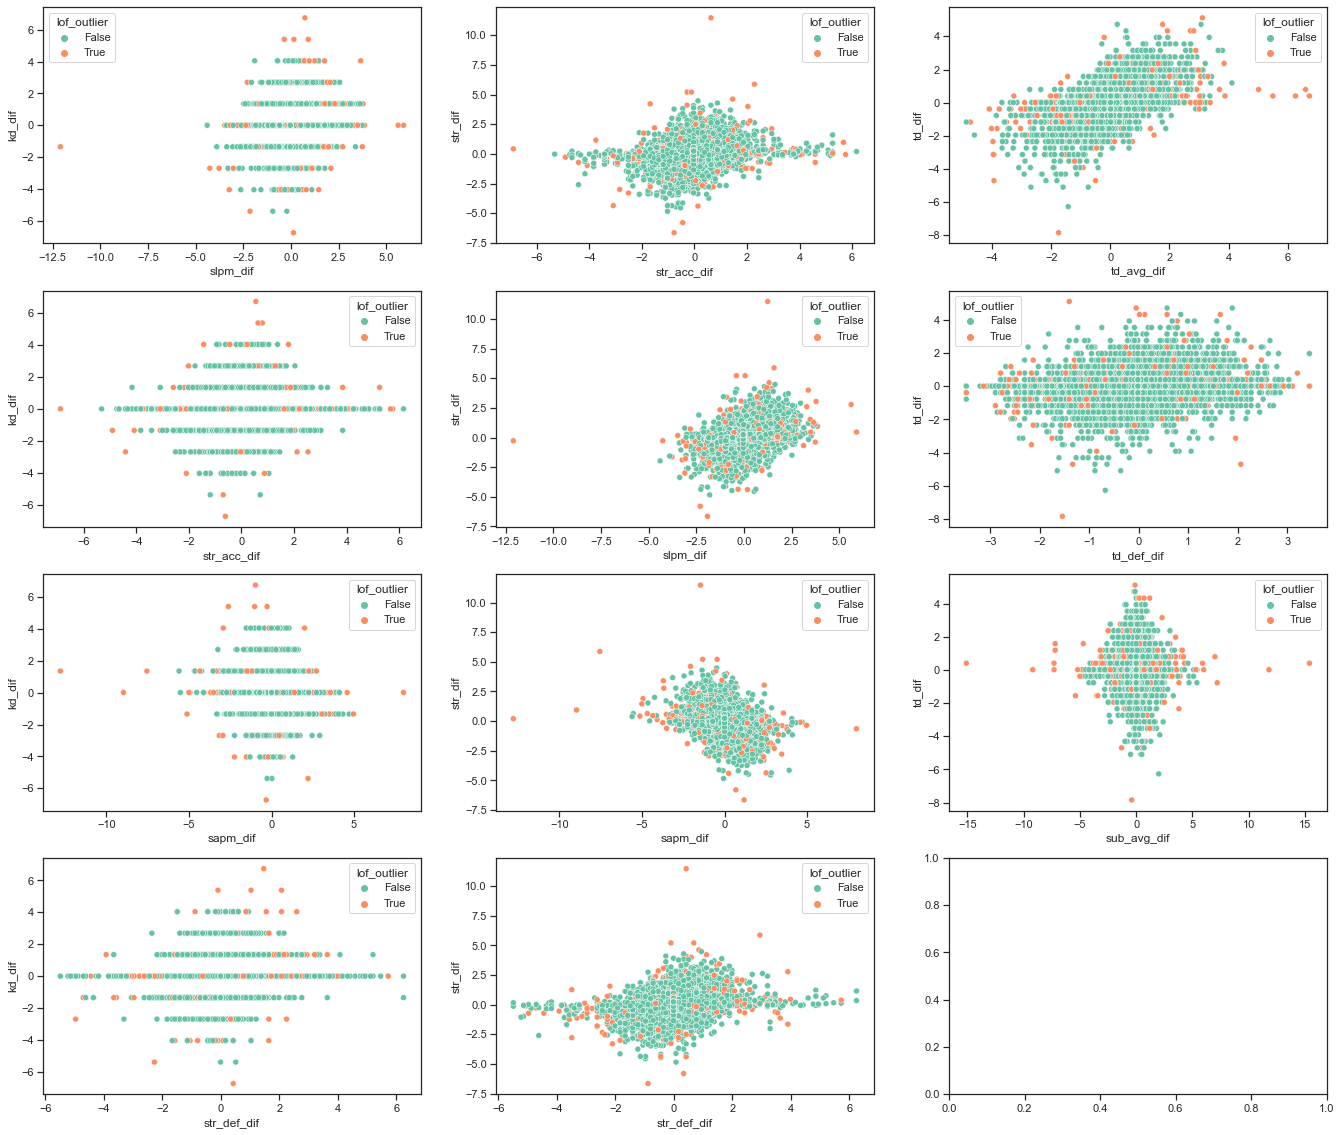

In [11]:
rows=4
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (23,20))

sns.scatterplot(ax=axs[0,0], x='slpm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,0], x='str_acc_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,0], x='sapm_dif', y='kd_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,0], x='str_def_dif', y='kd_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,1], x='str_acc_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,1], x='slpm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,1], x='sapm_dif', y='str_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[3,1], x='str_def_dif', y='str_dif', data=data, hue='lof_outlier')

sns.scatterplot(ax=axs[0,2], x='td_avg_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[1,2], x='td_def_dif', y='td_dif', data=data, hue='lof_outlier')
sns.scatterplot(ax=axs[2,2], x='sub_avg_dif', y='td_dif', data=data, hue='lof_outlier')

In [12]:
try:
    data.to_csv('../data/data_features_outliers_detected.csv', index=None)
    print('../data/data_features_outliers_detected.csv saved.')
except:
    print('error occurs saving ../data/data_features_outliers_detected.csv - might be file in use.')

../data/data_features_outliers_detected.csv saved.
